# Advanced Methods in Data Analysis

# Ejercicio 13 Analyze class homework - Grupo 8



## Integrantes
Laura Gutierrez   Código 201015209

Fernando Bautista Código 202027865

Fredi Baron       Código 202027522

Ingrid Hernández  Código 202028041

# Exercise 13

The result will be evaluated from a report in Jupyter, which must be found in a public GitHub repository. The project must be carried out in the groups assigned in class. Use clear and rigorous procedures. Due date: July 29, 2021, 11:59 am (NOON), through Bloque Neón + (Upload repository link).


In [1]:
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# from textblob import TextBlob, Word
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_excel('Consolidado_respuestas_escribir_v2.xlsx')
data.head()

,ID,Genero,Carrera de pregrado,Sector en el que trabaja,Edad,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E12 - Natural Language Processing Overview
0,1,M,Matemáticas,Estudio de mercados,30.0,Dentro de las diferentes aplicaciones que tien...,La principal diferencia entre las series de ti...,Los arboles de decisión son herramienta de Mac...,Al proponer un método para realizar una predic...,Durante el desarrollo de soluciones dentro de ...,La empresa kore.ai se especializa en la implem...
1,2,M,NaN,NaN,NaN,NaN,una serie de tiempo se enfoca en un individio ...,NaN,NaN,Un micro servicio es una parte de la arquitect...,NaN
2,3,M,NaN,NaN,NaN,Mercados energeticos: Tras la liberación y des...,Los datos de series de tiempo son un conjunto ...,NaN,Los metodos de ensamble nos permiten mejorar e...,Los microservicios defininen una nueva metodol...,NaN
3,4,M,Estadistica,Financiero,28.0,Las series de tiempo son una colección de obse...,Los datos de series de tiempo son un conjunto ...,Un árbol de decisión es una especie de mapa en...,Los métodos de ensamble de modelos o métodos c...,Los microservicios son tanto un estilo de arqu...,La función de autocompletar las palabras en Wh...
4,5,M,NaN,NaN,NaN,"1. Actualmente, la empresa de mascotas Laika q...",Un conjunto de datos de una serie de tiempo co...,NaN,Los modelos de ensamble consisten en mezclar l...,Los microservicios son tanto un estilo de arqu...,NaN


# Exercise 13.1

Analyze the writing patterns of each student


## Limpieza y análisis de patrones

Paso 1: Análisis de Tokenization

<FreqDist with 161 samples and 303 outcomes>


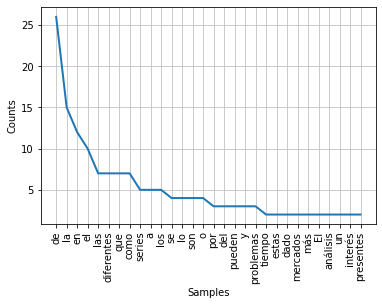

In [3]:
# Tokenize using the white spaces
E1=nltk.tokenize.WhitespaceTokenizer().tokenize(data["E1 - Examples of Time Series Analysis"][0])
from nltk.probability import FreqDist
fdist_E1 = FreqDist(E1)
print(fdist_E1)
fdist_E1.most_common(2)
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist_E1.plot(30,cumulative=False)
plt.show()

<FreqDist with 86 samples and 152 outcomes>


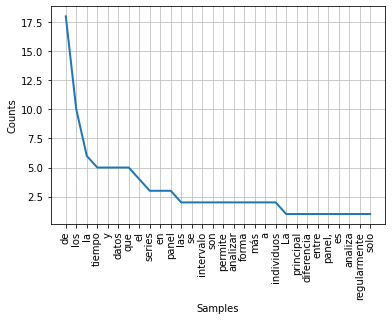

In [4]:
# Tokenize using the white spaces
E4=nltk.tokenize.WhitespaceTokenizer().tokenize(data["E4 - Panel Data"][0])
fdist_E4 = FreqDist(E4)
print(fdist_E4)
fdist_E4.most_common(2)
# Frequency Distribution Plot
fdist_E4.plot(30,cumulative=False)
plt.show()

<FreqDist with 158 samples and 308 outcomes>


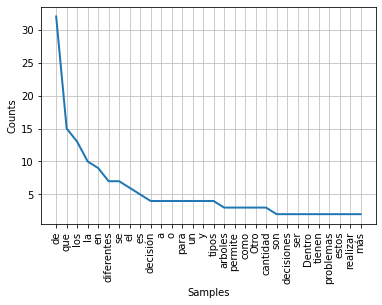

In [5]:
# Tokenize using the white spaces
E6=nltk.tokenize.WhitespaceTokenizer().tokenize(data["E6 - Decison Trees"][0])
fdist_E6 = FreqDist(E6)
print(fdist_E6)
fdist_E6.most_common(2)
# Frequency Distribution Plot
fdist_E6.plot(30,cumulative=False)
plt.show()

<FreqDist with 172 samples and 305 outcomes>


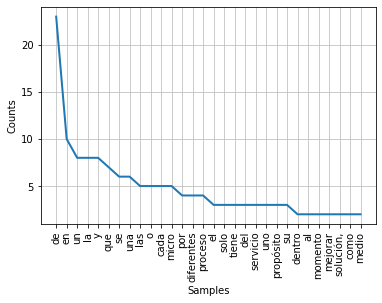

In [6]:
# Tokenize using the white spaces
E10=nltk.tokenize.WhitespaceTokenizer().tokenize(data["E10 - REST-API"][0])
fdist_E10 = FreqDist(E10)
print(fdist_E10)
fdist_E10.most_common(2)
# Frequency Distribution Plot
fdist_E10.plot(30,cumulative=False)
plt.show()

<FreqDist with 62 samples and 79 outcomes>


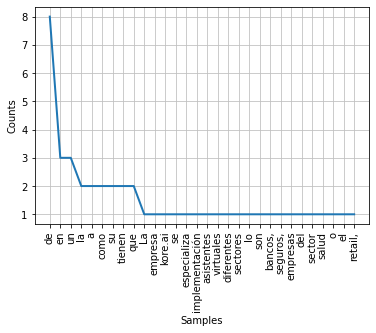

In [7]:
# Tokenize using the white spaces
E12=nltk.tokenize.WhitespaceTokenizer().tokenize(data["E12 - Natural Language Processing Overview"][0])
fdist_E12 = FreqDist(E12)
print(fdist_E12)
fdist_E12.most_common(2)
# Frequency Distribution Plot
fdist_E12.plot(30,cumulative=False)
plt.show()

Con las gráficas anteriores se evidencia que  debe realizarse un proceso de limpieza en las variables y stopwors al Texto que se va a analizar:

* Datos faltantes y dejar el texto en minusculas

* Eliminar acentos, signos de puntuación y caracteres especiales
* Stop words para analizar mejor los patrones de palabras

Paso 2: Datos faltantes

In [8]:
## Completitud

variables = list(data.columns)
data[variables] = np.where(data[variables]=="",np.nan,data[variables])

# Revisión de los datos faltantes a través de la completitud de cada variable.

incompletos = pd.DataFrame(data.isna().sum() / len(data))
incompletos = incompletos.reset_index()

incompletos.columns = ['variables','incompletos']

pd.set_option('display.max_rows', 500)
incompletos.sort_values('incompletos', ascending = False)

,variables,incompletos
2,Carrera de pregrado,0.289474
3,Sector en el que trabaja,0.289474
4,Edad,0.289474
10,E12 - Natural Language Processing Overview,0.263158
7,E6 - Decison Trees,0.210526
8,E8 - Ensemble Trees Overview,0.210526
5,E1 - Examples of Time Series Analysis,0.026316
9,E10 - REST-API,0.026316
0,ID,0.000000
1,Genero,0.000000


Se realizar a continuación ajuste de variables con datos faltantes como edad = 0 y las que son texto como no responde:

In [9]:
## Pasar a minúsculas 
variables_texto=data.iloc[:,5:11].columns
data[variables_texto] = data[variables_texto].apply(lambda x: x.str.lower())

In [10]:
variables_demo=data.iloc[:,2:4].columns
data[variables_demo] = data[variables_demo].apply(lambda x: x.str.lower())

In [11]:
## Quitar Tildes
data[variables_texto] = data[variables_texto].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))

In [12]:
data[variables_demo] = data[variables_demo].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))

In [13]:
# Validación de categorías Género, Carrera de pregrado, setor y edad 
por_genero = data.groupby(['Genero'])['ID'].count().to_frame().reset_index()
por_genero

,Genero,ID
0,F,10
1,M,28


En Carrera de pregrado y sector se ajustan las categorías para que queden homogenas, ya que la misma palabra está escrita de manera distinta:

In [14]:
data['Carrera de pregrado'] = data['Carrera de pregrado'].replace("Ing. Electronica","Ingenieria Electronica")

In [15]:
data['Carrera de pregrado'] = data['Carrera de pregrado'].replace("economista","economia")

In [16]:
data['Carrera de pregrado'] = data['Carrera de pregrado'].replace("ingeniera de sistemas","ingenieria de sistemas")

In [17]:
data['Carrera de pregrado'] = data['Carrera de pregrado'].replace("ingenieria indistrial, admon neg internacionales","ingenieria industrial y otra")
data['Carrera de pregrado'] = data['Carrera de pregrado'].replace("ingenieria industrial y economia","ingenieria industrial y otra")

In [18]:
por_carrera = data.groupby(['Carrera de pregrado'])['ID'].count().to_frame().reset_index()
por_carrera

,Carrera de pregrado,ID
0,biologia e ingenieria biomedica,1
1,economia,3
2,estadistica,6
3,finanzas,1
4,ing. electronica,1
5,ingenieria de sistemas,3
6,ingenieria electronica,2
7,ingenieria industrial,7
8,ingenieria industrial y otra,2
9,matematicas,1


Debido a que algunos sectores que se relacionan como por ejemplo Fintech, Financiero y Finanzas, agruparemos las categorías según su relación como se muestra a continuación:

In [19]:
data['Sector en el que trabaja'] = data['Sector en el que trabaja'].replace("data scientist - banca","financiero")
data['Sector en el que trabaja'] = data['Sector en el que trabaja'].replace("fintech","financiero")
data['Sector en el que trabaja'] = data['Sector en el que trabaja'].replace("infraestructura detransporte","transporte")

In [20]:
por_sector = data.groupby(['Sector en el que trabaja'])['ID'].count().to_frame().reset_index()
por_sector

,Sector en el que trabaja,ID
0,consultoria de negocios y tecnologia,1
1,consumo masivo,2
2,cultura,1
3,educacion,1
4,electrico y de comunicaciones,1
5,estudio de mercados,1
6,financiero,13
7,ingenieria de software,1
8,operaciones,1
9,pensiones,1


* Eliminación de caracteres especiales como (), /, "", puntos, comas y números:

In [21]:
# eliminar caracteres especiales
# caracter = ["(",")","/","'",",",".",":",";","1","0","2","3","4","5","6","7","8","9"]
# for car in caracter:
#     data[variables_texto] = data[variables_texto].apply(lambda x: x.str.replace(car, ''))

In [22]:
import nltk
from nltk.corpus import stopwords

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Laura.Gutiierrez\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
stopwords_esp = stopwords.words('spanish')

In [25]:
data_org = data.copy()

In [26]:
data_org.head()

,ID,Genero,Carrera de pregrado,Sector en el que trabaja,Edad,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E12 - Natural Language Processing Overview
0,1,M,matematicas,estudio de mercados,30.0,dentro de las diferentes aplicaciones que tien...,la principal diferencia entre las series de ti...,los arboles de decision son herramienta de mac...,al proponer un metodo para realizar una predic...,durante el desarrollo de soluciones dentro de ...,la empresa kore.ai se especializa en la implem...
1,2,M,NaN,NaN,NaN,NaN,una serie de tiempo se enfoca en un individio ...,NaN,NaN,un micro servicio es una parte de la arquitect...,NaN
2,3,M,NaN,NaN,NaN,mercados energeticos: tras la liberacion y des...,los datos de series de tiempo son un conjunto ...,NaN,los metodos de ensamble nos permiten mejorar e...,los microservicios defininen una nueva metodol...,NaN
3,4,M,estadistica,financiero,28.0,las series de tiempo son una coleccion de obse...,los datos de series de tiempo son un conjunto ...,un arbol de decision es una especie de mapa en...,los metodos de ensamble de modelos o metodos c...,los microservicios son tanto un estilo de arqu...,la funcion de autocompletar las palabras en wh...
4,5,M,NaN,NaN,NaN,"1. actualmente, la empresa de mascotas laika q...",un conjunto de datos de una serie de tiempo co...,NaN,los modelos de ensamble consisten en mezclar l...,los microservicios son tanto un estilo de arqu...,NaN


In [27]:
data.isnull().sum()

ID                                             0
Genero                                         0
Carrera de pregrado                           11
Sector en el que trabaja                      11
Edad                                          11
E1 - Examples of Time Series Analysis          1
E4 - Panel Data                                0
E6 - Decison Trees                             8
E8 - Ensemble Trees Overview                   8
E10 - REST-API                                 1
E12 - Natural Language Processing Overview    10
dtype: int64

In [28]:
data.Edad.replace(np.nan, 0, inplace=True)

In [29]:
data['Carrera de pregrado']=data['Carrera de pregrado'].replace(np.nan,'No responde')
data['Sector en el que trabaja']=data['Sector en el que trabaja'].replace(np.nan,'No responde')
data['E12 - Natural Language Processing Overview']=data['E12 - Natural Language Processing Overview'].replace(np.nan,'No responde')
data['E6 - Decison Trees']=data['E6 - Decison Trees'].replace(np.nan,'No responde')
data['E8 - Ensemble Trees Overview']=data['E8 - Ensemble Trees Overview'].replace(np.nan,'No responde')
data['E1 - Examples of Time Series Analysis']=data['E1 - Examples of Time Series Analysis'].replace(np.nan,'No responde')
data['E10 - REST-API']=data['E10 - REST-API'].replace(np.nan,'No responde')
data.head(5)

,ID,Genero,Carrera de pregrado,Sector en el que trabaja,Edad,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E12 - Natural Language Processing Overview
0,1,M,matematicas,estudio de mercados,30.0,dentro de las diferentes aplicaciones que tien...,la principal diferencia entre las series de ti...,los arboles de decision son herramienta de mac...,al proponer un metodo para realizar una predic...,durante el desarrollo de soluciones dentro de ...,la empresa kore.ai se especializa en la implem...
1,2,M,No responde,No responde,0.0,No responde,una serie de tiempo se enfoca en un individio ...,No responde,No responde,un micro servicio es una parte de la arquitect...,No responde
2,3,M,No responde,No responde,0.0,mercados energeticos: tras la liberacion y des...,los datos de series de tiempo son un conjunto ...,No responde,los metodos de ensamble nos permiten mejorar e...,los microservicios defininen una nueva metodol...,No responde
3,4,M,estadistica,financiero,28.0,las series de tiempo son una coleccion de obse...,los datos de series de tiempo son un conjunto ...,un arbol de decision es una especie de mapa en...,los metodos de ensamble de modelos o metodos c...,los microservicios son tanto un estilo de arqu...,la funcion de autocompletar las palabras en wh...
4,5,M,No responde,No responde,0.0,"1. actualmente, la empresa de mascotas laika q...",un conjunto de datos de una serie de tiempo co...,No responde,los modelos de ensamble consisten en mezclar l...,los microservicios son tanto un estilo de arqu...,No responde


In [30]:
# use CountVectorizer to create document-term matrices from X

vec_E1 = CountVectorizer(stop_words=stopwords_esp,ngram_range=(1, 1))
E1_dtm = vec_E1.fit_transform(data['E1 - Examples of Time Series Analysis'])

vec_E4 = CountVectorizer(stop_words=stopwords_esp,ngram_range=(1, 1))
E4_dtm = vec_E4.fit_transform(data['E4 - Panel Data'])

vec_E6 = CountVectorizer(stop_words=stopwords_esp,ngram_range=(1, 1))
E6_dtm = vec_E6.fit_transform(data['E6 - Decison Trees'])
                                   
vec_E8 = CountVectorizer(stop_words=stopwords_esp,ngram_range=(1, 1))
E8_dtm = vec_E8.fit_transform(data['E8 - Ensemble Trees Overview'])

vec_E10 = CountVectorizer(stop_words=stopwords_esp,ngram_range=(1, 1))
E10_dtm = vec_E10.fit_transform(data['E10 - REST-API'])

vec_E12 = CountVectorizer(stop_words=stopwords_esp,ngram_range=(1, 1))
E12_dtm = vec_E12.fit_transform(data['E12 - Natural Language Processing Overview'])


## Validación de patron de palabras por cada Ejercicio

(-0.5, 399.5, 199.5, -0.5)

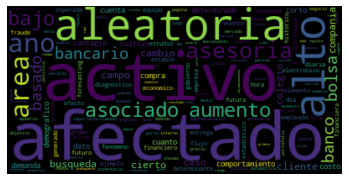

In [31]:
## Análisis del texto E1 - Examples of Time Series Analysis 

df_E1 = vec_E1.get_feature_names()
text_E1 = " ".join(title for title in df_E1)
wordcloud_E1= WordCloud().generate(text_E1)
plt.imshow(wordcloud_E1, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

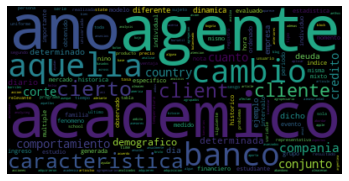

In [32]:
## Análisis del texto E4 - Panel Data

df_E4 = vec_E4.get_feature_names()
text_E4 = " ".join(title for title in df_E4)
wordcloud_E4= WordCloud().generate(text_E4)
plt.imshow(wordcloud_E4, interpolation='bilinear')
plt.axis("off")


(-0.5, 399.5, 199.5, -0.5)

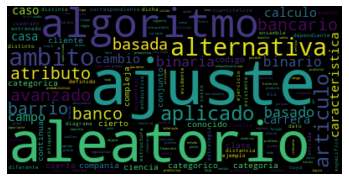

In [33]:
## Análisis del texto E6 - Decison Trees

df_E6 = vec_E6.get_feature_names()
text_E6 = " ".join(title for title in df_E6)
wordcloud_E6= WordCloud().generate(text_E6)
plt.imshow(wordcloud_E6, interpolation='bilinear')
plt.axis("off")


(-0.5, 399.5, 199.5, -0.5)

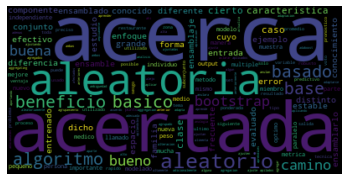

In [34]:
## Análisis del texto E8 - Ensemble Trees Overview

df_E8 = vec_E8.get_feature_names()
text_E8 = " ".join(title for title in df_E8)
wordcloud_E8= WordCloud().generate(text_E8)
plt.imshow(wordcloud_E8, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

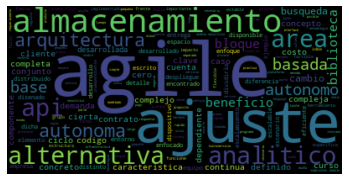

In [35]:
## Análisis del texto E10 - REST-API

df_E10 = vec_E10.get_feature_names()
text_E10 = " ".join(title for title in df_E10)
wordcloud_E10= WordCloud().generate(text_E10)
plt.imshow(wordcloud_E10, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

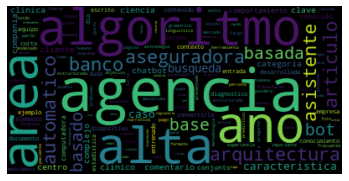

In [36]:
## Análisis del texto E12 - Natural Language Processing Overview

df_E12 = vec_E12.get_feature_names()
text_E12 = " ".join(title for title in df_E12)
wordcloud_E12= WordCloud().generate(text_E12)
plt.imshow(wordcloud_E12, interpolation='bilinear')
plt.axis("off")

Como se observa en las gráficas y estadísticas los siguientes datos relevantes:

    * Una gran parte de los estudiantes tienen una preparación de pregradao en Estadística o Ingeniería Industrial
    * En el sector financiero se ubican una gran parte de los estudiantes
    * El 73.68% de los estudiantes son de género masculino
    * De los seis ejercicios trabajados en el repositorio de GitHub hay un ó de palabras que se indetifican como
      recurrentes algoritmo, aleatoria, cambio, arquitectura, agile, ajute, acertada.
    

Unificamos los textos escritos por cada persona en un solo texto para ser evaluado en los modelos a continuación

In [37]:
data_org['Text'] =  data_org['E1 - Examples of Time Series Analysis'].fillna('') + data_org['E4 - Panel Data'].fillna('') + data_org['E6 - Decison Trees'].fillna('') + data_org['E8 - Ensemble Trees Overview'].fillna('') + data_org['E10 - REST-API'].fillna('') + data_org['E12 - Natural Language Processing Overview'].fillna('')

In [38]:
data_org.head()

,ID,Genero,Carrera de pregrado,Sector en el que trabaja,Edad,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E12 - Natural Language Processing Overview,Text
0,1,M,matematicas,estudio de mercados,30.0,dentro de las diferentes aplicaciones que tien...,la principal diferencia entre las series de ti...,los arboles de decision son herramienta de mac...,al proponer un metodo para realizar una predic...,durante el desarrollo de soluciones dentro de ...,la empresa kore.ai se especializa en la implem...,dentro de las diferentes aplicaciones que tien...
1,2,M,NaN,NaN,NaN,NaN,una serie de tiempo se enfoca en un individio ...,NaN,NaN,un micro servicio es una parte de la arquitect...,NaN,una serie de tiempo se enfoca en un individio ...
2,3,M,NaN,NaN,NaN,mercados energeticos: tras la liberacion y des...,los datos de series de tiempo son un conjunto ...,NaN,los metodos de ensamble nos permiten mejorar e...,los microservicios defininen una nueva metodol...,NaN,mercados energeticos: tras la liberacion y des...
3,4,M,estadistica,financiero,28.0,las series de tiempo son una coleccion de obse...,los datos de series de tiempo son un conjunto ...,un arbol de decision es una especie de mapa en...,los metodos de ensamble de modelos o metodos c...,los microservicios son tanto un estilo de arqu...,la funcion de autocompletar las palabras en wh...,las series de tiempo son una coleccion de obse...
4,5,M,NaN,NaN,NaN,"1. actualmente, la empresa de mascotas laika q...",un conjunto de datos de una serie de tiempo co...,NaN,los modelos de ensamble consisten en mezclar l...,los microservicios son tanto un estilo de arqu...,NaN,"1. actualmente, la empresa de mascotas laika q..."


In [40]:
data_org.drop(['E1 - Examples of Time Series Analysis','E4 - Panel Data','E6 - Decison Trees','E8 - Ensemble Trees Overview','E10 - REST-API','E12 - Natural Language Processing Overview'], inplace=True, axis=1)

In [42]:
data_org.isnull().sum()

ID                           0
Genero                       0
Carrera de pregrado         11
Sector en el que trabaja    11
Edad                        11
Text                         0
dtype: int64

In [43]:
data_org.dropna(inplace=True)
data_org

,ID,Genero,Carrera de pregrado,Sector en el que trabaja,Edad,Text
0,1,M,matematicas,estudio de mercados,30.0,dentro de las diferentes aplicaciones que tien...
3,4,M,estadistica,financiero,28.0,las series de tiempo son una coleccion de obse...
5,6,M,estadistica,publico,30.0,las series de tiempo desempenan un papel funda...
6,7,M,ingenieria de sistemas,educacion,33.0,1. prediccion de precios de acciones\n2. anali...
8,9,M,ingenieria electronica,consultoria de negocios y tecnologia,44.0,pronostico del tiempo: dado el comportamiento ...
9,10,M,finanzas,financiero,25.0,1) comportamiento del precio del dolar. usando...
12,13,M,ingenieria electronica,financiero,28.0,1. contactos call center: el numero de contact...
13,14,F,ingenieria industrial y otra,financiero,29.0,ejemplo 1: cantidad de usuarios nuevos que se ...
14,15,F,estadistica,electrico y de comunicaciones,31.0,los siguientes son tres ejemplos en los cuales...
15,16,M,ingenieria industrial,financiero,49.0,1.\tpara anticipar el futuro de una empresa ma...


In [46]:
data_org.rename({"Sector en el que trabaja": "Industria"}, axis='columns', inplace =True)

In [47]:
data_org.head(1)

,ID,Genero,Carrera de pregrado,Industria,Edad,Text
0,1,M,matematicas,estudio de mercados,30.0,dentro de las diferentes aplicaciones que tien...


In [52]:
data_org['Genero'].describe()

count     27
unique     2
top        M
freq      19
Name: Genero, dtype: object

In [53]:
data_org['Genero'].value_counts()

M    19
F     8
Name: Genero, dtype: int64

In [54]:
data_org['Industria'].describe()

count             27
unique            14
top       financiero
freq              13
Name: Industria, dtype: object

In [55]:
data_org['Industria'].value_counts()

financiero                               13
consumo masivo                            2
telecomunicaciones                        1
consultoria  de negocios y tecnologia     1
electrico y de comunicaciones             1
transporte                                1
publico                                   1
salud                                     1
operaciones                               1
educacion                                 1
ingenieria de software                    1
estudio de mercados                       1
pensiones                                 1
cultura                                   1
Name: Industria, dtype: int64

Como se puede observar al revisar la frecuencia en las categorías de la variable Industria, la muestra se encuentra desbalanceada. Por lo cual, dejaremos solo dos categorías para el ejercicio: "financiero" y "no financiero"

In [56]:
data_org.loc[data_org.Industria != "financiero", "Industria"] = "no financiero"

In [60]:
df = data_org.copy()
# data set final
df

,ID,Genero,Carrera de pregrado,Industria,Edad,Text
0,1,M,matematicas,no financiero,30.0,dentro de las diferentes aplicaciones que tien...
3,4,M,estadistica,financiero,28.0,las series de tiempo son una coleccion de obse...
5,6,M,estadistica,no financiero,30.0,las series de tiempo desempenan un papel funda...
6,7,M,ingenieria de sistemas,no financiero,33.0,1. prediccion de precios de acciones\n2. anali...
8,9,M,ingenieria electronica,no financiero,44.0,pronostico del tiempo: dado el comportamiento ...
9,10,M,finanzas,financiero,25.0,1) comportamiento del precio del dolar. usando...
12,13,M,ingenieria electronica,financiero,28.0,1. contactos call center: el numero de contact...
13,14,F,ingenieria industrial y otra,financiero,29.0,ejemplo 1: cantidad de usuarios nuevos que se ...
14,15,F,estadistica,no financiero,31.0,los siguientes son tres ejemplos en los cuales...
15,16,M,ingenieria industrial,financiero,49.0,1.\tpara anticipar el futuro de una empresa ma...


In [61]:
data_org['Industria'].value_counts()

no financiero    14
financiero       13
Name: Industria, dtype: int64

# Exercise 13.2

Create a classifier to predict the gender of each student

In [63]:
y = df['Genero']
X = df['Text']

In [64]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vect):
    X_dtm = vect.fit_transform(X)
    print('Features: ', X_dtm.shape[1])
    nb = MultinomialNB()
    print(pd.Series(cross_val_score(nb, X_dtm, y, cv=10)).describe())

In [89]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2), max_features=3, stop_words = stopwords_esp)
tokenize_test(vect)

Features:  3
count    10.000000
mean      0.683333
std       0.253981
min       0.333333
25%       0.541667
50%       0.666667
75%       0.916667
max       1.000000
dtype: float64


C:\Users\Laura.Gutiierrez\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [90]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2), max_features=3)
tokenize_test(vect)

Features:  3
count    10.000000
mean      0.866667
std       0.172133
min       0.666667
25%       0.666667
50%       1.000000
75%       1.000000
max       1.000000
dtype: float64


C:\Users\Laura.Gutiierrez\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Teniendo en cuenta las "stop words" o preposiciones como un parámetro de tunning del modelo, observamos que al quitarlas se obtiene un accuracy menor que al dejarlas.
- Accuracy sin stop words 0.683333
- Accuracy con stop words 0.866667

# Exercise 13.3

Create a classifier to predict the industry in which each student works

In [91]:
y1 = df['Industria']
X = df['Text']

In [100]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [107]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test1(vect1):
    X_dtm = vect1.fit_transform(X)
    print('Features: ', X_dtm.shape[1])
    nb = RandomForestClassifier()
    print(pd.Series(cross_val_score(nb, X_dtm, y1, cv=10)).describe())

In [108]:
# include 1-grams and 2-grams
vect1 = CountVectorizer(ngram_range=(1, 2), max_features=3, stop_words = stopwords_esp)
tokenize_test1(vect1)

Features:  3
count    10.000000
mean      0.466667
std       0.219427
min       0.000000
25%       0.333333
50%       0.500000
75%       0.666667
max       0.666667
dtype: float64


In [109]:
# include 1-grams and 2-grams
vect1 = CountVectorizer(ngram_range=(1, 2), max_features=3)
tokenize_test1(vect1)

Features:  3
count    10.000000
mean      0.400000
std       0.250924
min       0.000000
25%       0.333333
50%       0.416667
75%       0.625000
max       0.666667
dtype: float64


In [110]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test2(vect2):
    X_dtm = vect2.fit_transform(X)
    print('Features: ', X_dtm.shape[1])
    nb = MultinomialNB()
    print(pd.Series(cross_val_score(nb, X_dtm, y1, cv=10)).describe())

In [111]:
# include 1-grams and 2-grams
vect2 = CountVectorizer(ngram_range=(1, 2), max_features=3, stop_words = stopwords_esp)
tokenize_test2(vect2)

Features:  3
count    10.000000
mean      0.500000
std       0.272166
min       0.000000
25%       0.333333
50%       0.500000
75%       0.666667
max       1.000000
dtype: float64


In [113]:
# include 1-grams and 2-grams
vect2 = CountVectorizer(ngram_range=(1, 2), max_features=3)
tokenize_test2(vect2)

Features:  3
count    10.000000
mean      0.550000
std       0.261170
min       0.000000
25%       0.500000
50%       0.583333
75%       0.666667
max       1.000000
dtype: float64


Al aplicar los algoritmos Random Forest y Naive Bayes Multinomial, usando stop words como una variable de tunning, obtuvimos los siguientes resultados:

#### Accuracy:
- Random Forest aplicando Stop words = 0.466667
- Random Forest sin aplicar Stop words = 0.400000
- NB Multinomial aplicando Stop words = 0.500000
- NB Multinomial sin aplicar Stop words = 0.550000

Por lo anterior, se selecciona el mejor modelo NB Multinomial sin aplicar Stop words

In [ ]:
Link Git hub: 